In [71]:
options(warn=-1)

In [68]:
library(tidyverse)
library(magrittr)
library(ggrepel)
library(plotly)
library(gridExtra)

In [69]:
theme_set(
  theme_bw()
)

In [74]:
casesLocal <- read_csv('casesLocal.csv')
testsLocal <- read_csv('testsLocal.csv')
counterMeasures <- read_csv('counterMeasures.csv')
casesGlobal <- read_csv('casesGlobal.csv')

Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  confirmed = col_double(),
  country_id = col_double(),
  id = col_double(),
  location = col_character(),
  location_level = col_character()
)
Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  country = col_character(),
  cumulative_tests = col_double()
)
Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  country = col_character(),
  measure = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  active = col_double(),
  active_dailiy_growth_rate = col_double(),
  active_rolling_3_day_growth_rate = col_double(),
  confirmed = col_double(),
  confirmed_daily = col_double(),
  country = col_character(),
  daily_change_in_active_cases = col_double(),
  deaths = col_double(),
  deaths_daily = col_double(),
  lat = col_double(),
  long = col_double(),
  recovered = col_double(),
  recovered_daily = col_double()
)


In [75]:
most_infected_countries <- 
  c('South Africa', 'Italy', 'Korea, South', 'United Kingdom', 'US', 'Spain', 'France', 'Germany')

casesGlobal %>%
  rename(Date = X1) %>%
  select(Date, country, confirmed) %>%
  spread(country, confirmed) ->
  confirmed_cases

cases_by_day <- tibble()

country_names <- casesGlobal$country %>% unique

for (country in country_names) {
  
  confirmed_cases %>%
    select(country) %>%
    na.omit ->
    data
  
  data %>% 
    mutate(Day = c(1:nrow(data)),
           Country = country) %>%
    rename('cases' = country) %>%
    rbind(
      cases_by_day
    ) ->
    cases_by_day
  
}

cases_by_day %>% 
  filter(Country %in% most_infected_countries) ->
  cases_by_day_top 

In [62]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
cases_by_day_top %>%
  ggplot(aes(Day, cases, color = Country)) +
  geom_line() +
  geom_point(data = cases_by_day_top %>% 
               group_by(Country) %>%
               summarise(Day = max(Day),
                         cases = max(cases))) +
  geom_text_repel(aes(label = Country), 
            data = cases_by_day_top %>% 
              group_by(Country) %>%
              summarise(Day = max(Day),
                        cases = max(cases)),
            vjust = -1) +
  scale_x_continuous(breaks = seq(0, length(cases_by_day_top$Day %>% unique), 5)) +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, 650000, 100000)) +
  theme(
    legend.position = 'none'
  ) +
  labs(
    x = '', 
    y = 'Cumulative Cases', 
    title = 'Other countries Vs South Africa'
  ) +
  annotate("rect", xmin = 35, xmax = 60, ymin = 0, ymax = 150000, alpha = .2) -> fig1

In [64]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
cases_by_day_top %>%
  filter(Day %in% c(35:60) & cases %in% c(0:150000)) ->
  cases_by_day_top_filtered

cases_by_day_top_filtered %>%
  ggplot(aes(Day, cases, color = Country)) +
  geom_line() +
  geom_point(data = cases_by_day_top_filtered %>% 
               group_by(Country) %>%
               summarise(Day = max(Day),
                         cases = max(cases))) +
  geom_text_repel(aes(label = Country), 
            data = cases_by_day_top_filtered %>% 
              group_by(Country) %>%
              summarise(Day = max(Day),
                        cases = max(cases)),
            vjust = -1) +
  scale_x_continuous(breaks = seq(35, 60, 5)) +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, 150000, 20000)) +
  theme(
    legend.position = 'none'
  ) +
  labs(
    x = 'Number of Days since inception', 
    y = 'Cumulative Cases',
    title = '(Zoomed In)'
  ) -> fig2

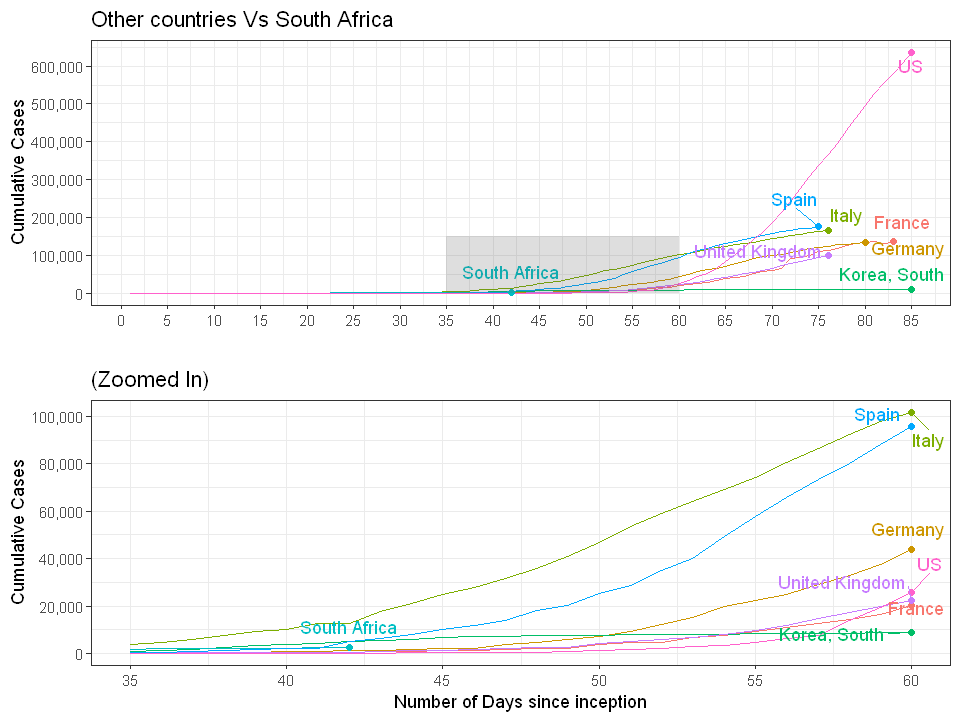

In [67]:
options(repr.plot.width = 8, repr.plot.height = 6)
grid.arrange(
    fig1, fig2,
    nrow = 2
)